# Super Dense Coding LAB:

In [1]:
#importing  Qiskit Libraries

from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.visualization import *

1. Alice & Bob Share an **EPR** pair (also called as "Entangled State").

2. Alice & Bob gets *spatially seperated*.

3. Now Alice wants to send information of **2x Classical Bits** to bob. So she has 4 possible combinaitions to send [**00**/**01**/**10**/**11**]. Alice can send any one of these combinations.
    -  To do this Alice has to perform **4** different Unitary operations on the Entangled Qubit which she is holding with her.
    -  Let the Unitary operations are **UT1**, **UT2**, **UT3**, **UT4**.
    -  These **4** encoding gives use **4** **orthogonal States** respectively.

|Classical bits Alice Wants to send|Gates Applied by Alice on her Qubit| Final State of Bob|
|---------|----------|--------|
|00|**I**|$\frac{|00\rangle+|11\rangle}{\sqrt{2}}$|
|01|**X**|$\frac{|10\rangle+|01\rangle}{\sqrt{2}}$|
|10|**iY**|$\frac{|01\rangle-|10\rangle}{\sqrt{2}}$|
|11|**Z**|$\frac{|00\rangle-|11\rangle}{\sqrt{2}}$|

Here, Alice uses only one Qubit to transfer information of **2x Classical bits**.

**Step -1 :** First We need to construct a Quantum circuit with 2 Qubits.

In [2]:
# Create separate quantum registers for alice and bob
qr_alice = QuantumRegister(1, 'alice')
qr_bob = QuantumRegister(1, 'bob')
# Create a quantum circuit using these registers
qc = QuantumCircuit(qr_alice, qr_bob)
msg = "01"

/home/cdac/.local/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


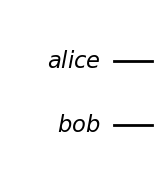

In [3]:
qc.draw("mpl")

**Step-2 :** Now we need to Entangle the Qubits of both alice and bob. Here entangled state is **Bell State**. We can use a **Hadamard** and **CNOT** gates to create following **Bell state**.
$$|\phi^{+}\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$$

In [4]:
qc.h(0)
qc.cx(0,1)
qc.barrier()

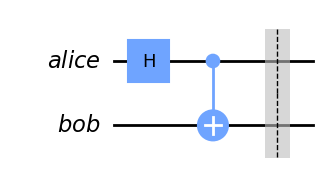

In [5]:
qc.draw("mpl")

Now we have created an Entangled state between alice and Bob Qubits. They will be always remain connected to each other regardless of being far away from each other.

**Step -3:** Now Alice needs to encode the message to her qubit.

In [6]:
#00 -> I gate or No gate
#01 -> X gate
#10 -> Z gate
#11 -> X & Z gates

if msg == "00":
    qc.id(0)

elif msg == "01":
    qc.x(0)

elif msg == "10":
    qc.z(0)

elif msg == "11":
    qc.x(0)
    qc.z(0)

else:
    print("Enter valid message")

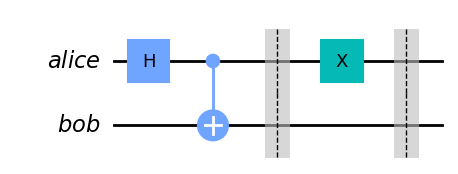

In [7]:
qc.barrier()
qc.draw("mpl")

Now Alice has encoded the message to her Qubit of **EPR** pair.

**Step -4:** Now Alice will send her qubit to the bob classically. And now bob has **2 Qubits** in his possession. To decode the information he need to perform Bell-Basis measurement on both the Qubits. To do that he first need to apply reverse EPR. Initially he need to apply CNOT and next Hadamard and then perform the measurement of both Qubits.

In [8]:
qc.cx(0,1)
qc.h(0)
qc.measure_all()

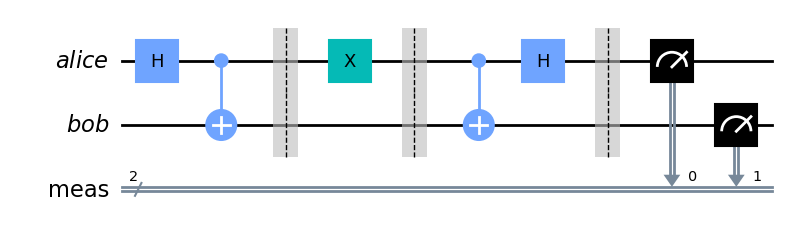

In [9]:
qc.draw("mpl")

# Execution of Circuit on Simulator :

In [10]:
from qiskit_aer import Aer

In [11]:
backend = Aer.get_backend("statevector_simulator")

In [12]:
job = backend.run(qc, shots=1000)
result = job.result().get_counts()
print(result)

{'10': 1000}


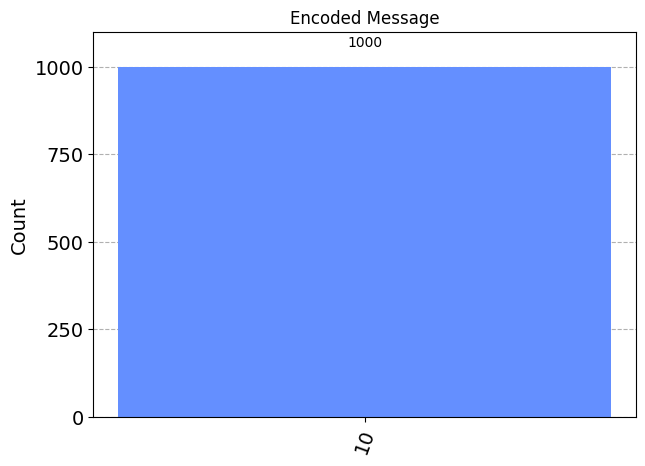

In [13]:
from qiskit.visualization import plot_histogram

plot_histogram(result, title="Encoded Message")

**Note :** Qiskit result follows **Little Endian** format. In the above result we have got the value of **"10"** as answer. But we have given **"01"** which is in **big-endian** format. So here we need to consider the result as **01** only. 

In [19]:
#if there is any noise in the simulator

from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,pauli_error, depolarizing_error, thermal_relaxation_error,reset_error)
# Create an empty noise model
noise_parameters = NoiseModel()

depol_one_qb_error = 0.05
depol_two_qb_error = 0.005
noise_parameters.add_all_qubit_quantum_error(depolarizing_error(depol_one_qb_error, 1), ['rx', 'ry', 'rz'])
noise_parameters.add_all_qubit_quantum_error(depolarizing_error(depol_two_qb_error, 2), ['cx'])

# Add reset noise to all single qubit resets
reset_to_zero_error = 0.005
reset_to_one_error = 0.005
noise_parameters.add_all_qubit_quantum_error(reset_error(reset_to_zero_error, reset_to_one_error),["reset"])

job_N = backend.run(qc, noise_model=noise_parameters,shots=1000)
result_N = job_N.result().get_counts()
print(result_N)

{'00': 1, '01': 3, '10': 991, '11': 5}
